# Customer Market Segmentation

## - Background Information
Marketing is crucial for the growth and sustainability of any business. Marketers can help to build the companies' brand to engage customers for growing revenue and increase sales.One of a key point of marketers is to know their customers and identity their needs. By understanding the customers, markerters can launch a targeted ad marketing campaign that is tailored for their specific needs. If data about the customers is available, data scientist can applied it to perform market segmentation.

## - Problem Statement
Let's say I have been hired as a consultant to a bank in New York City. The bank has extensive data on their customers for the pass six months. They want to have a model that can cluster customers into different groups or categories by launching a targetted ad marketing campaign.

## - Applied Techniques
- Perform exploratory data analysis and visualize data of customers
- Fill out missing data
- Using Elbow Method to find the optimal number of clusters
- Apply K-means algorithms in scikit-learn to perform market segmentation
- To perform dimensionality reduction with autoencoders
- Train autoencoders model in Keras
- To perform dimensionality reduction with Principal components analysis (PCA)

## - Imoprt Libraries and Data

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

%matplotlib inline

In [6]:
creditcard_df = pd.read_csv('data/Marketing_credit_card_ataset.csv')
creditcard_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


The definition of features
- CUSTID: Identification of Credit Card holder 
- BALANCE: Balance amount left in customer's account to make purchases
- BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
- PURCHASES: Amount of purchases made from account
- ONEOFFPURCHASES: Maximum purchase amount done in one-go
- INSTALLMENTS_PURCHASES: Amount of purchase done in installment
- CASH_ADVANCE: Cash in advance given by the user
- PURCHASES_FREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
- ONEOFF_PURCHASES_FREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
- PURCHASES_INSTALLMENTS_FREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
- CASH_ADVANCE_FREQUENCY: How frequently the cash in advance being paid
- CASH_ADVANCE_TRX: Number of Transactions made with "Cash in Advance"
- PURCHASES_TRX: Number of purchase transactions made
- CREDIT_LIMIT: Limit of Credit Card for user
- PAYMENTS: Amount of Payment done by user
- MINIMUM_PAYMENTS: Minimum amount of payments made by user  
- PRC_FULL_PAYMENT: Percent of full payment paid by user
- TENURE: Tenure of credit card service for user



In [7]:
creditcard_df.shape

(8950, 18)

## - Exploratory Data Analysis (EDA)

In [9]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

- CREDIT_LIMIT has missing data
- MINIMUM_PAYMENTS has missing data

In [13]:
creditcard_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


- Mean balance is 1564 
- Balance frequency is frequently updated on average 0.9
- Purchases average is 1000
- one off purchase average is 600
- Average purchases frequency is around 0.5
- average ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, and CASH_ADVANCE_FREQUENCY are generally low
- Average credit limit is 4500
- Percent of full payment is 15%
- Average tenure is 11 years

In [14]:
# the info of the max of ONEOFF_PURCHASES is 40761.250000
creditcard_df[creditcard_df['ONEOFF_PURCHASES'] == 40761.250000]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [15]:
# the info of the max of CASH_ADVANCE is 47137.211760000006
creditcard_df[creditcard_df['CASH_ADVANCE'] == 47137.211760000006]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


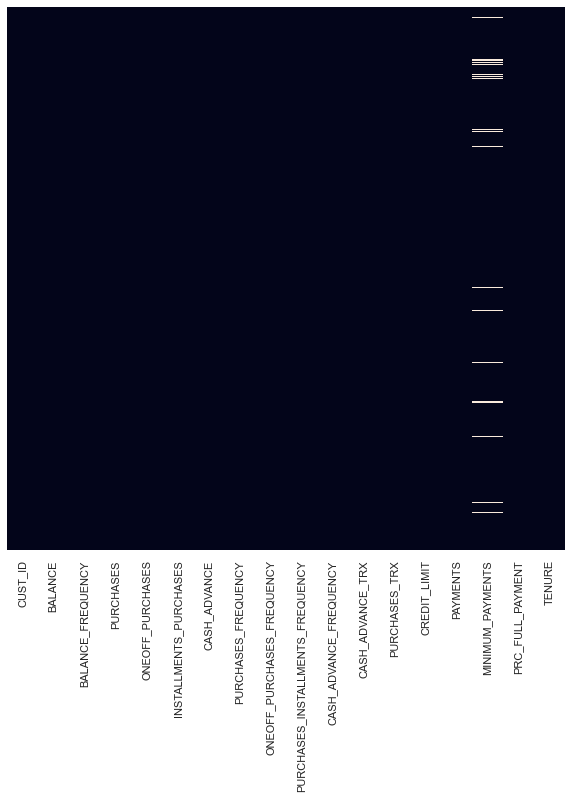

In [17]:
# missing data
plt.figure(figsize=(10, 10))
sns.heatmap(creditcard_df.isnull(), yticklabels=False, cbar=False);

In [20]:
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [21]:
# fill up the missing data with mens values
creditcard_df['CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].fillna(creditcard_df['CREDIT_LIMIT'].mean())
creditcard_df['MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].fillna(creditcard_df['MINIMUM_PAYMENTS'].mean())

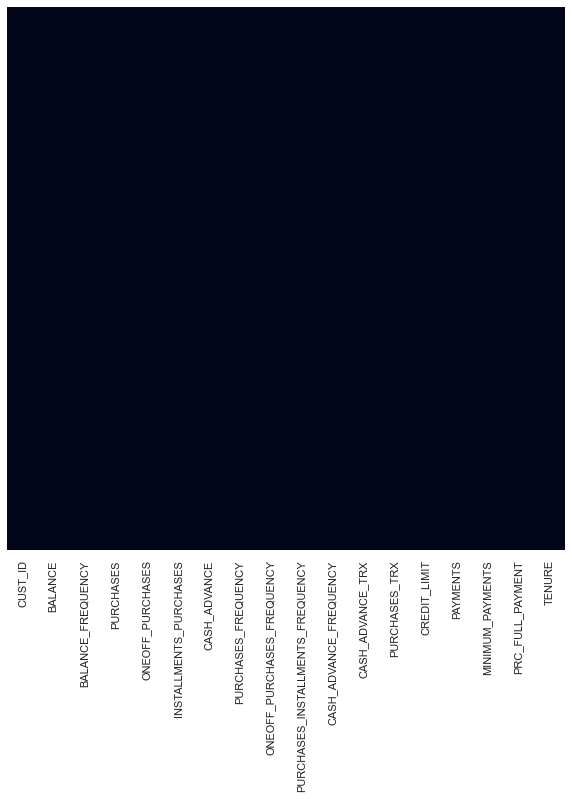

In [22]:
plt.figure(figsize=(10, 10))
sns.heatmap(creditcard_df.isnull(), yticklabels=False, cbar=False);

In [23]:
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [24]:
# check if has duplicated entries in data
creditcard_df.duplicated().sum()

0

In [25]:
# drop columns which not make snese
creditcard_df.drop(columns=['CUST_ID'], axis=1, inplace=True)

In [26]:
creditcard_df.shape

(8950, 17)

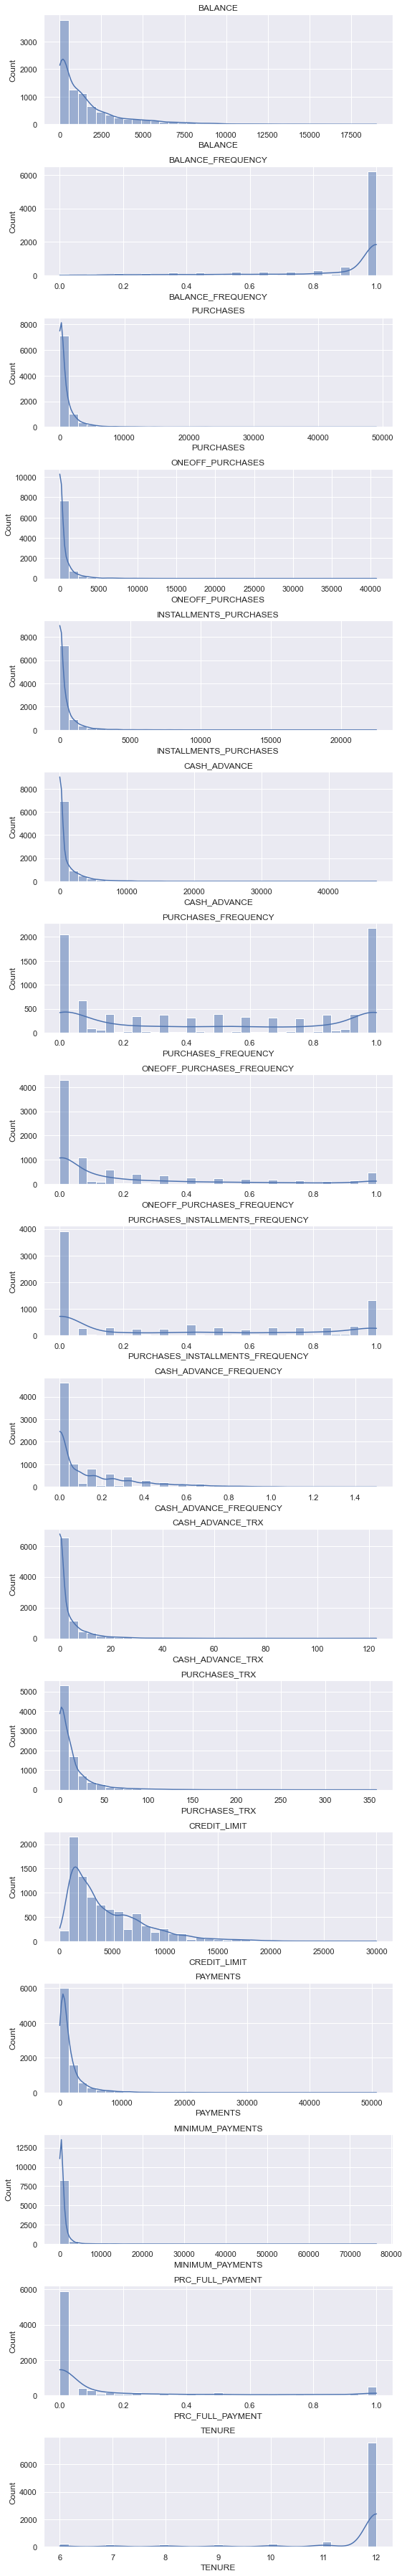

In [28]:
# check the distribution of each columns
plt.figure(figsize=(8, 50))
for i in range(len(creditcard_df.columns)):
    plt.subplot(17, 1, i+1)
    sns.histplot(creditcard_df[creditcard_df.columns[i]], bins=35, kde=True)
    plt.title(creditcard_df.columns[i])
    plt.tight_layout();

In [29]:
# correlation
creditcard_df.corr()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.322412,0.181261,0.164350,0.126469,0.496692,-0.077944,0.073166,-0.063186,0.449218,0.385152,0.154338,0.531267,0.322802,0.394282,-0.318959,0.072692
BALANCE_FREQUENCY,0.322412,1.000000,0.133674,0.104323,0.124292,0.099388,0.229715,0.202415,0.176079,0.191873,0.141555,0.189626,0.095795,0.065008,0.114249,-0.095082,0.119776
PURCHASES,0.181261,0.133674,1.000000,0.916845,0.679896,-0.051474,0.393017,0.498430,0.315567,-0.120143,-0.067175,0.689561,0.356959,0.603264,0.093515,0.180379,0.086288
ONEOFF_PURCHASES,0.164350,0.104323,0.916845,1.000000,0.330622,-0.031326,0.264937,0.524891,0.127729,-0.082628,-0.046212,0.545523,0.319721,0.567292,0.048597,0.132763,0.064150
INSTALLMENTS_PURCHASES,0.126469,0.124292,0.679896,0.330622,1.000000,-0.064244,0.442418,0.214042,0.511351,-0.132318,-0.073999,0.628108,0.256496,0.384084,0.131687,0.182569,0.086143
CASH_ADVANCE,0.496692,0.099388,-0.051474,-0.031326,-0.064244,1.000000,-0.215507,-0.086754,-0.177070,0.628522,0.656498,-0.075850,0.303983,0.453238,0.139223,-0.152935,-0.068312
PURCHASES_FREQUENCY,-0.077944,0.229715,0.393017,0.264937,0.442418,-0.215507,1.000000,0.501343,0.862934,-0.308478,-0.203478,0.568430,0.119778,0.103464,0.002976,0.305802,0.061506
ONEOFF_PURCHASES_FREQUENCY,0.073166,0.202415,0.498430,0.524891,0.214042,-0.086754,0.501343,1.000000,0.142329,-0.111716,-0.069088,0.544869,0.295030,0.243537,-0.029963,0.157531,0.082466
PURCHASES_INSTALLMENTS_FREQUENCY,-0.063186,0.176079,0.315567,0.127729,0.511351,-0.177070,0.862934,0.142329,1.000000,-0.262958,-0.169207,0.529975,0.060752,0.085551,0.029590,0.250087,0.073275
CASH_ADVANCE_FREQUENCY,0.449218,0.191873,-0.120143,-0.082628,-0.132318,0.628522,-0.308478,-0.111716,-0.262958,1.000000,0.799561,-0.131168,0.132616,0.183192,0.097898,-0.249773,-0.133372


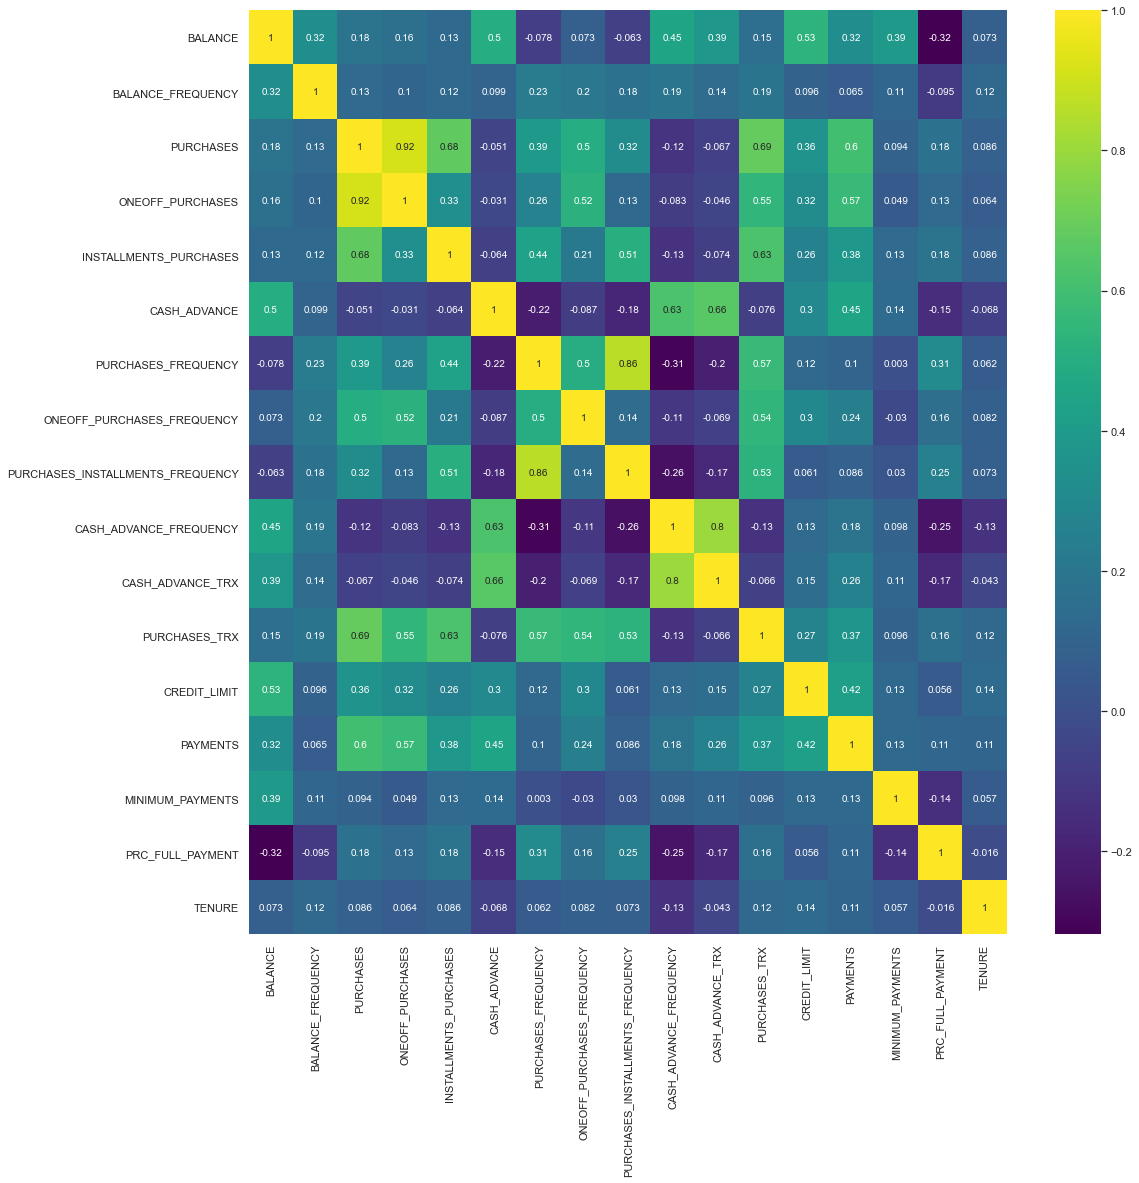

In [33]:
plt.figure(figsize=(17, 17))
sns.heatmap(creditcard_df.corr(), annot=True, cmap='viridis');

- Correlation between PURCHASES and ONEOFF_PURCHASES and INSTALLMENTS_PURCHASES 
- Trend between PURCHASES and CREDIT_LIMIT and PAYMENTS
- PURCHASES have high correlation between ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES, 
- PURCHASES_TRX(purchase transactions), CREDIT_LIMIT and PAYMENTS. 
- Strong Positive Correlation between PURCHASES_FREQUENCY and PURCHASES_INSTALLMENT_FREQUENCY

## - K-Means

### 1. Scaled Data

In [34]:
scaler = StandardScaler()
creditcard_scaled_df = scaler.fit_transform(creditcard_df)
creditcard_scaled_df[:3]

array([[-0.73198937, -0.24943448, -0.42489974, -0.35693402, -0.34907882,
        -0.46678555, -0.80649035, -0.67866081, -0.70731317, -0.67534886,
        -0.47606982, -0.51133325, -0.96043334, -0.52897879, -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, -0.35693402, -0.45457623,
         2.60560451, -1.22175806, -0.67866081, -0.91699519,  0.57396272,
         0.11007385, -0.59179588,  0.68863903,  0.81864213,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823,  0.10888851, -0.45457623,
        -0.46678555,  1.26984323,  2.67345108, -0.91699519, -0.67534886,
        -0.47606982, -0.10902012,  0.82606173, -0.38380474, -0.10166318,
        -0.52555097,  0.36067954]])

In [36]:
# try to make 8, 14, 17, 23...clusters and sum of the distances of each cluster's pionts to centroid
# then put them in a list.
inertia_1 = []

for i in range(1, 15):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(creditcard_scaled_df)
    inertia_1.append(kmeans.inertia_)
    
inertia_1

[152149.99999999878,
 127785.23846426504,
 111986.79432859499,
 99074.46231273624,
 91503.04779640742,
 84852.7187187307,
 79527.23511924711,
 74509.55155602418,
 69875.7860304449,
 66595.77264635224,
 63618.653052856345,
 61386.87535680922,
 59167.3000028136,
 57499.02590332636]

### 2. Elbow Method
**Find a optimal number of clusters**

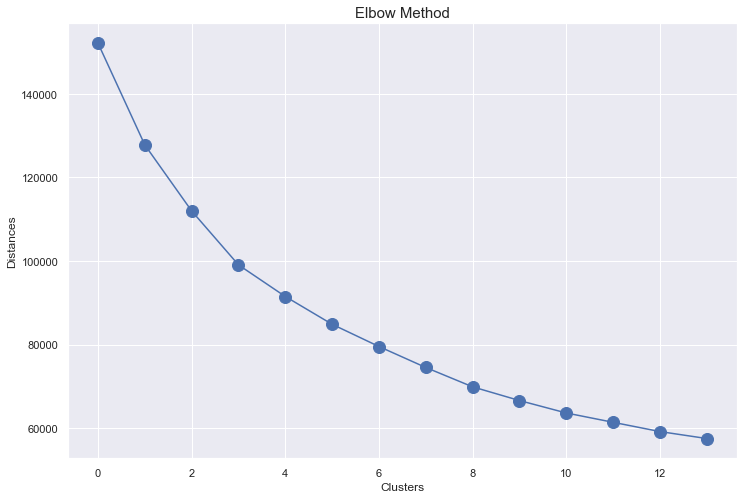

In [46]:
# using inertia_1 to plot a elbow chart
plt.figure(figsize=(12, 8))
plt.plot(inertia_1, marker='o', markersize=12)
plt.title('Elbow Method', fontdict={'fontsize':15})
plt.xlabel('Clusters')
plt.ylabel('Distances');

- I will choose number 6 to continue my coding baced on the elbow chart.

### 3. Apply K-Means Model

In [47]:
# apply k-means model in order to get a contribute of 'labels_', which are the labels for the creditcard_df
kmeans_model = KMeans(n_clusters=6)
kmeans_model.fit(creditcard_scaled_df)
labels = kmeans_model.labels_

labels

array([3, 5, 4, ..., 2, 3, 3], dtype=int32)

In [55]:
set(labels)

{0, 1, 2, 3, 4, 5}

In [54]:
labels.shape

(8950,)

In [49]:
# using number 6 as 6 kinds of centroid of creditcard_df
kmeans_model.cluster_centers_

array([[-0.69785911, -2.12033131, -0.3128843 , -0.23115419, -0.3150408 ,
        -0.30703338, -0.55867437, -0.41915882, -0.46381005, -0.48454831,
        -0.3579029 , -0.42538175, -0.20749231, -0.22115135, -0.25608939,
         0.26170955, -0.16443964],
       [ 1.4302377 ,  0.41946659,  6.91504796,  6.08303393,  5.17226599,
         0.03877815,  1.09069901,  1.87930303,  1.04941338, -0.2492271 ,
        -0.03816597,  4.64622756,  2.19837119,  4.78370351,  1.08094535,
         0.82400116,  0.33461299],
       [-0.39383987,  0.30893288, -0.06550132, -0.24457384,  0.29441114,
        -0.36543879,  0.96723736, -0.37508249,  1.14253487, -0.46260036,
        -0.35769873,  0.12568057, -0.32768922, -0.24844203, -0.05397265,
         0.34038067, -0.02499333],
       [-0.01491029,  0.37180659, -0.34476434, -0.22326291, -0.4049165 ,
        -0.08464128, -0.82456646, -0.33442518, -0.76944753,  0.12926272,
        -0.02990435, -0.47002963, -0.33587981, -0.26243796, -0.03120338,
        -0.45096263

In [50]:
kmeans_model.cluster_centers_.shape

(6, 17)

In [51]:
# then using 'cluster_centers_' contribute to consist a data frame
cluster_centers = pd.DataFrame(data=kmeans_model.cluster_centers_, columns=creditcard_df.columns)
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.697859,-2.120331,-0.312884,-0.231154,-0.315041,-0.307033,-0.558674,-0.419159,-0.463810,-0.484548,-0.357903,-0.425382,-0.207492,-0.221151,-0.256089,0.261710,-0.164440
1,1.430238,0.419467,6.915048,6.083034,5.172266,0.038778,1.090699,1.879303,1.049413,-0.249227,-0.038166,4.646228,2.198371,4.783704,1.080945,0.824001,0.334613
2,-0.393840,0.308933,-0.065501,-0.244574,0.294411,-0.365439,0.967237,-0.375082,1.142535,-0.462600,-0.357699,0.125681,-0.327689,-0.248442,-0.053973,0.340381,-0.024993
3,-0.014910,0.371807,-0.344764,-0.223263,-0.404916,-0.084641,-0.824566,-0.334425,-0.769448,0.129263,-0.029904,-0.470030,-0.335880,-0.262438,-0.031203,-0.450963,-0.008146
4,0.132857,0.427461,0.922849,0.876435,0.571869,-0.309172,1.087242,1.846995,0.536152,-0.404774,-0.318717,1.179576,0.687091,0.372135,-0.028854,0.438437,0.270829
5,1.595015,0.377103,-0.209799,-0.152139,-0.216652,1.942739,-0.457571,-0.191450,-0.411604,1.891136,1.841683,-0.251848,0.964296,0.767154,0.513171,-0.392541,-0.091374


In [56]:
# inversed the data to original dataset
cluster_centers_inverse = scaler.inverse_transform(cluster_centers)
cluster_centers_inverse = pd.DataFrame(data=cluster_centers_inverse, columns=creditcard_df.columns)
cluster_centers_inverse

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,111.940005,0.374984,334.722698,208.768758,126.180160,335.007775,0.266128,0.077414,0.180107,0.038181,0.806402,4.136433,3739.507541,1092.932372,267.401010,0.230260,11.297256
1,4541.393882,0.976638,15777.311395,10689.027791,5088.283605,1060.190695,0.928101,0.763090,0.781501,0.085271,2.988372,130.197674,12493.023256,15581.496801,3383.304083,0.394721,11.965116
2,744.730380,0.950454,863.260246,186.494884,677.299987,212.528902,0.878550,0.090563,0.818510,0.042573,0.807796,17.833781,3302.181990,1013.928520,738.425562,0.253270,11.483871
3,1533.440325,0.965348,266.610507,221.866670,44.906680,801.374386,0.159412,0.102692,0.058639,0.161011,3.044752,3.026654,3272.381266,973.411678,791.488373,0.021816,11.506417
4,1841.005881,0.978532,2974.886195,2047.140769,928.202047,330.523207,0.926713,0.753452,0.577518,0.054145,1.073820,44.029680,6994.366265,2810.439582,796.962577,0.281950,11.879756
5,4884.363456,0.966603,554.965502,339.918418,215.152223,5052.886343,0.306705,0.145344,0.200855,0.513580,15.816960,8.449845,8002.951960,3953.978616,2060.130748,0.038903,11.395036


In [58]:
# now cancatenate the cluster labels to the original data frame (creditcard_df)
creditcard_with_labels_df = pd.concat([creditcard_df, pd.DataFrame(data=labels, columns=['CLUSTER'])], axis=1)
creditcard_with_labels_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,3
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,5
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,4
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,3
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,3


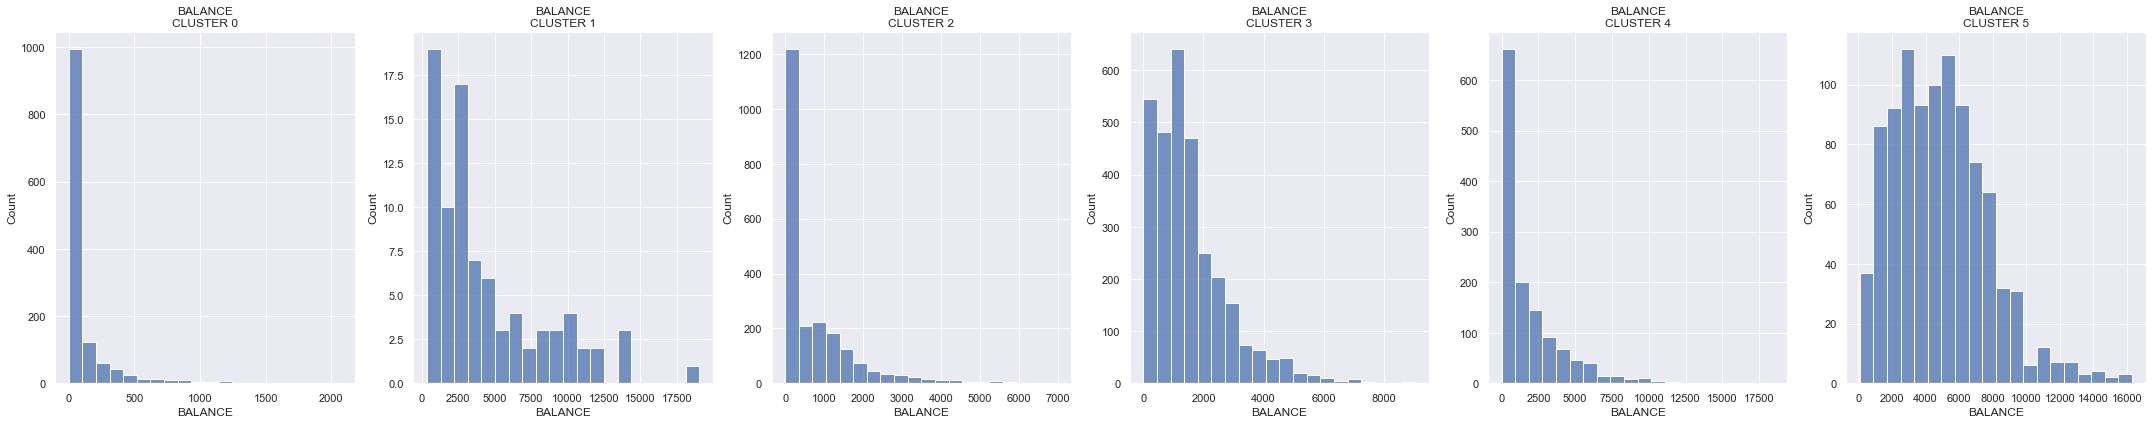

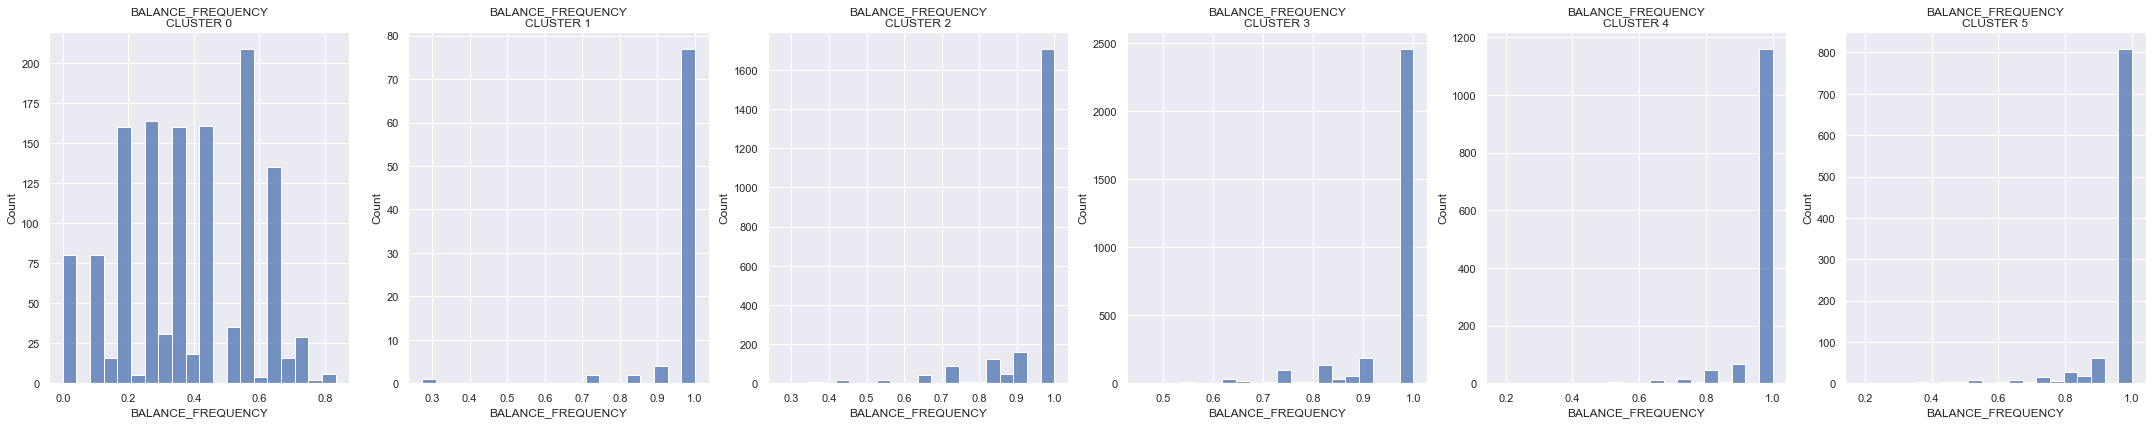

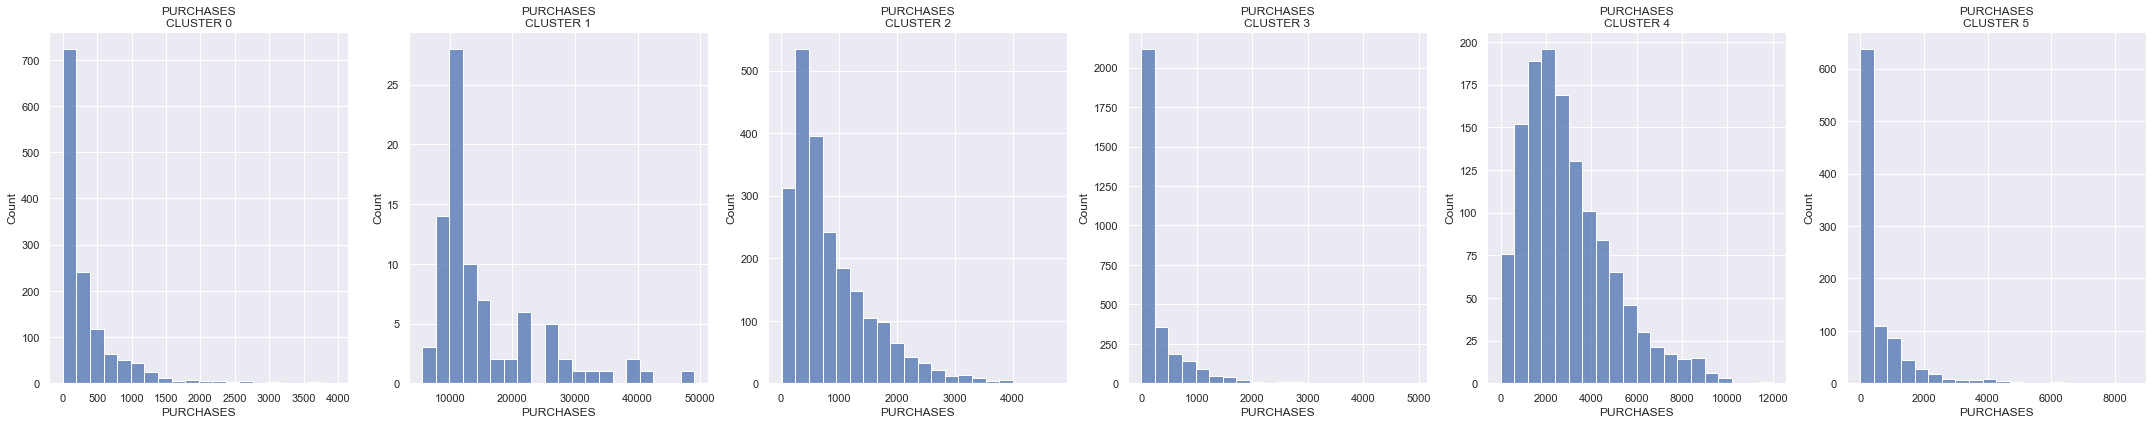

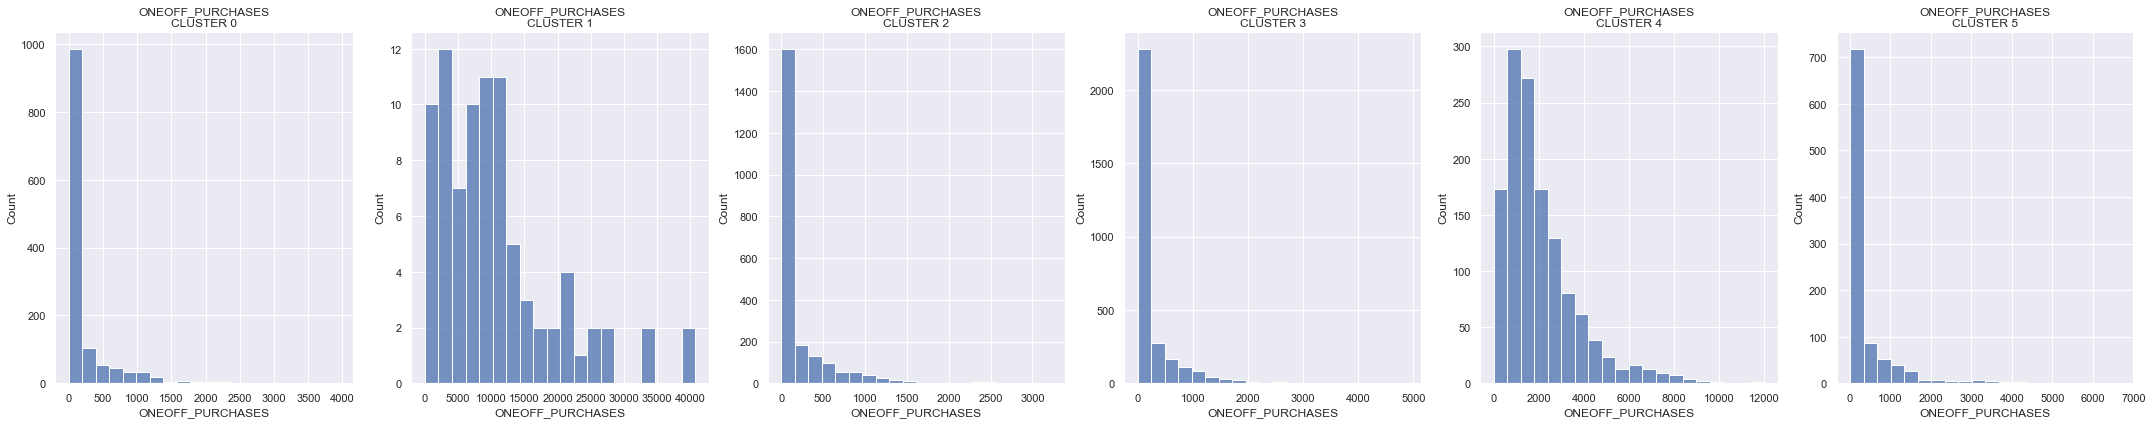

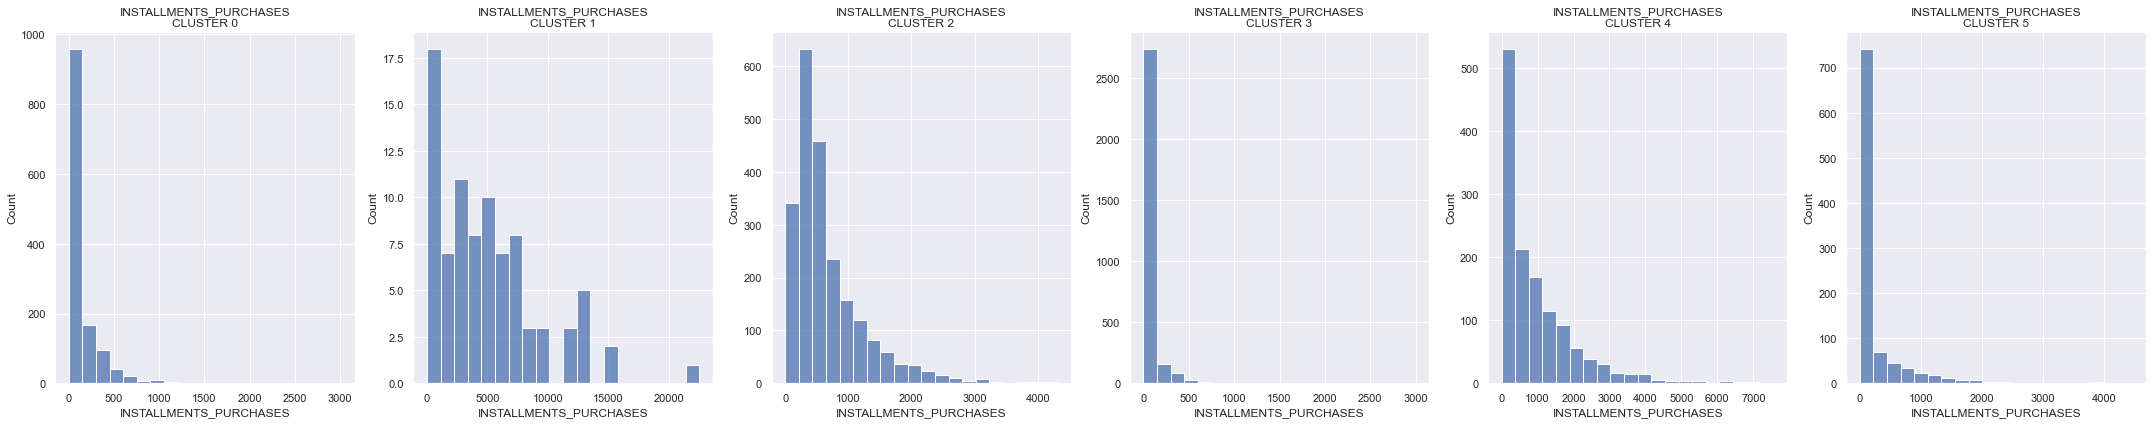

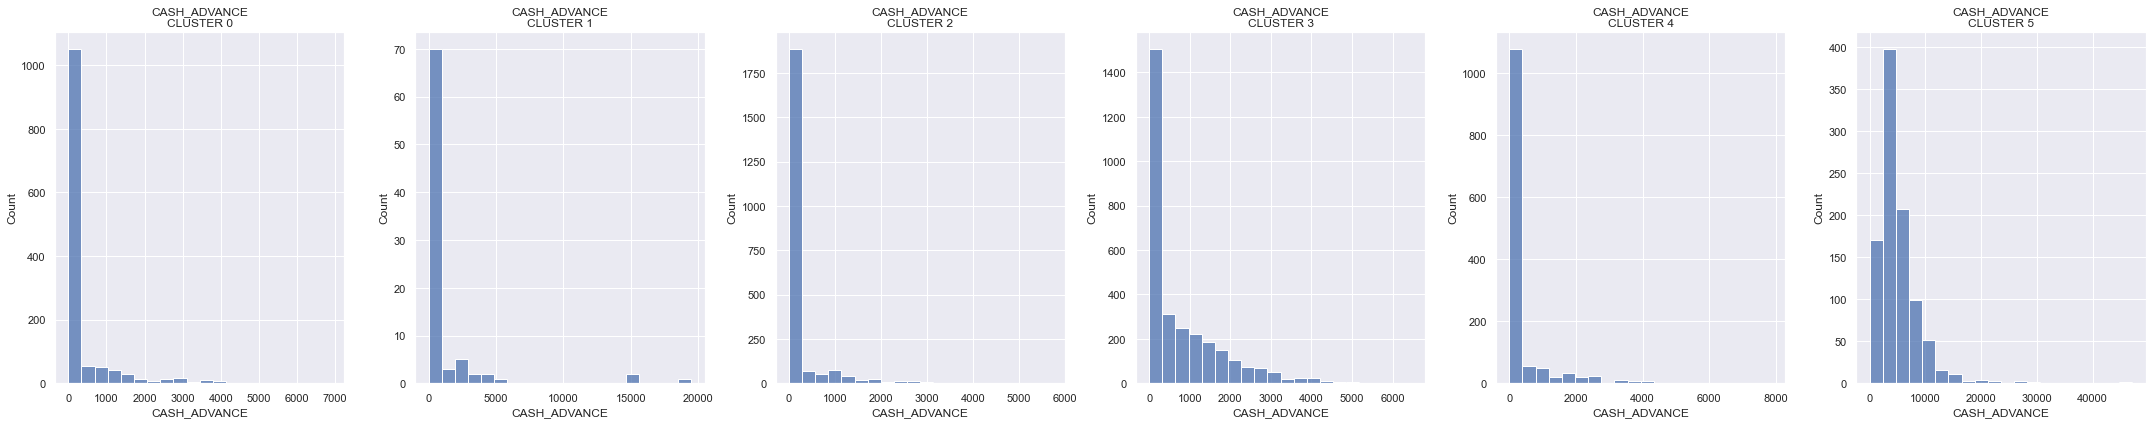

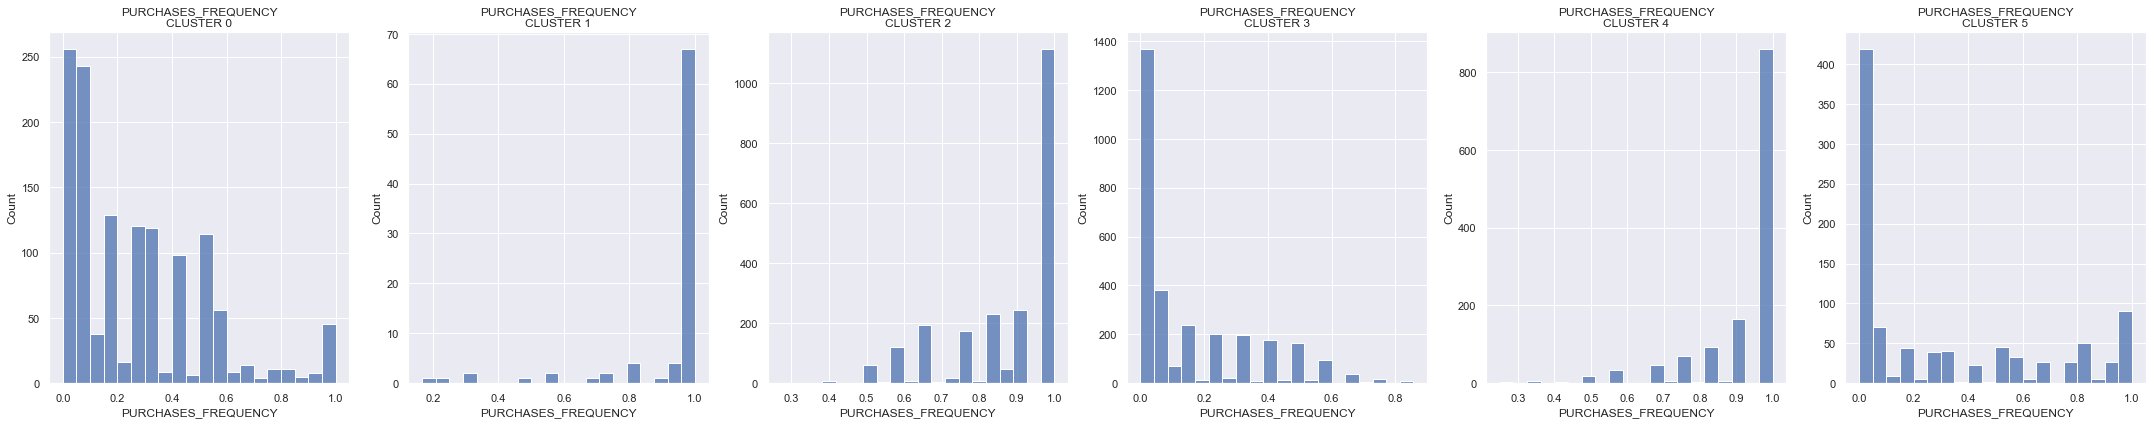

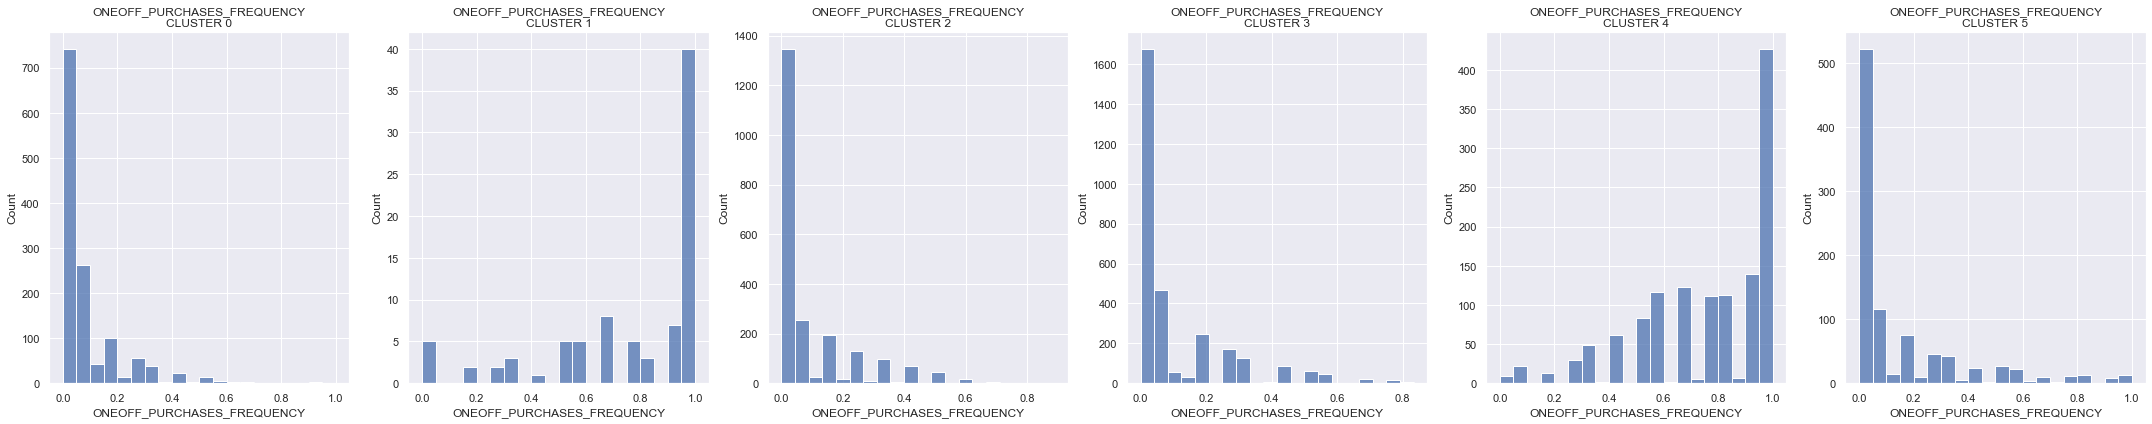

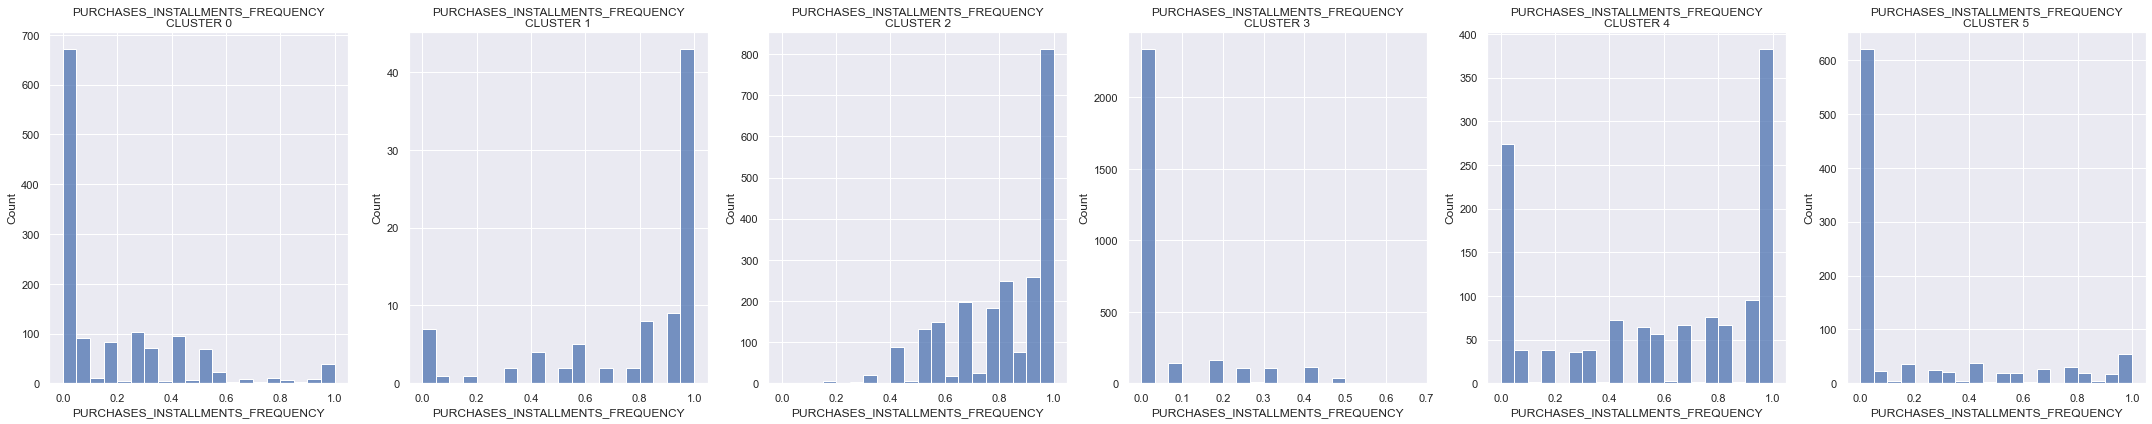

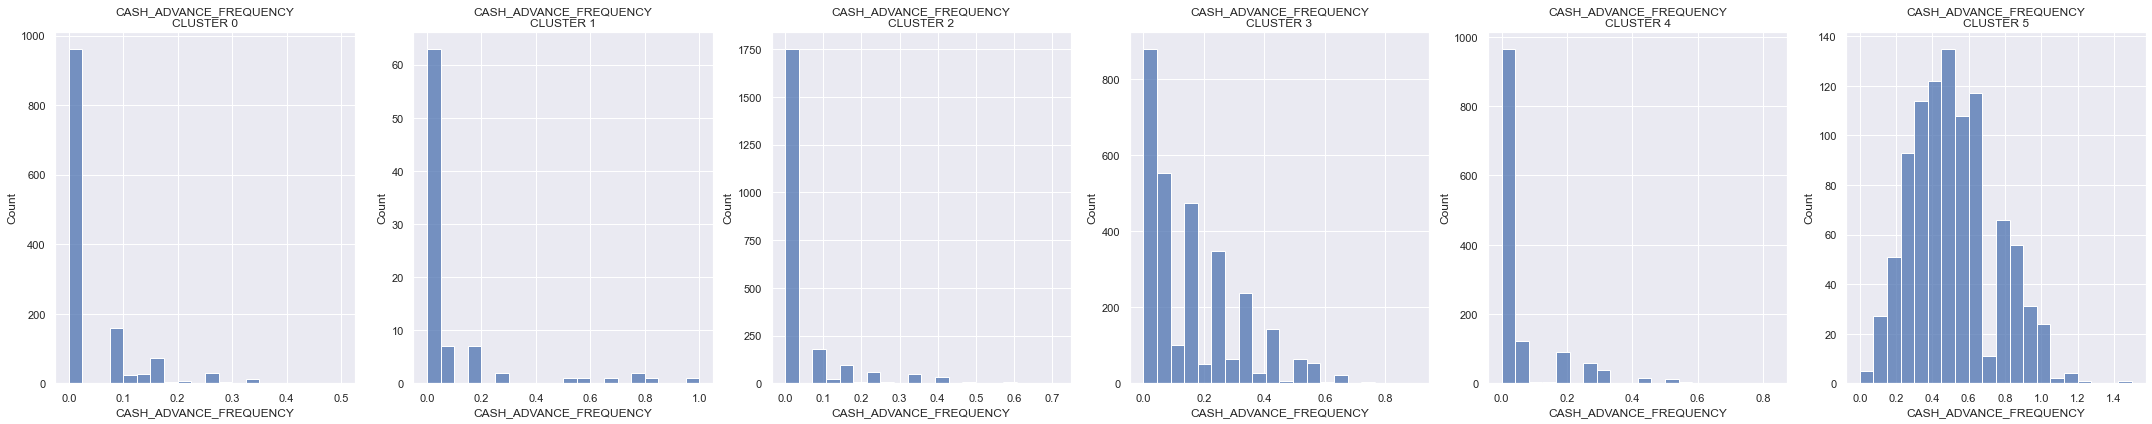

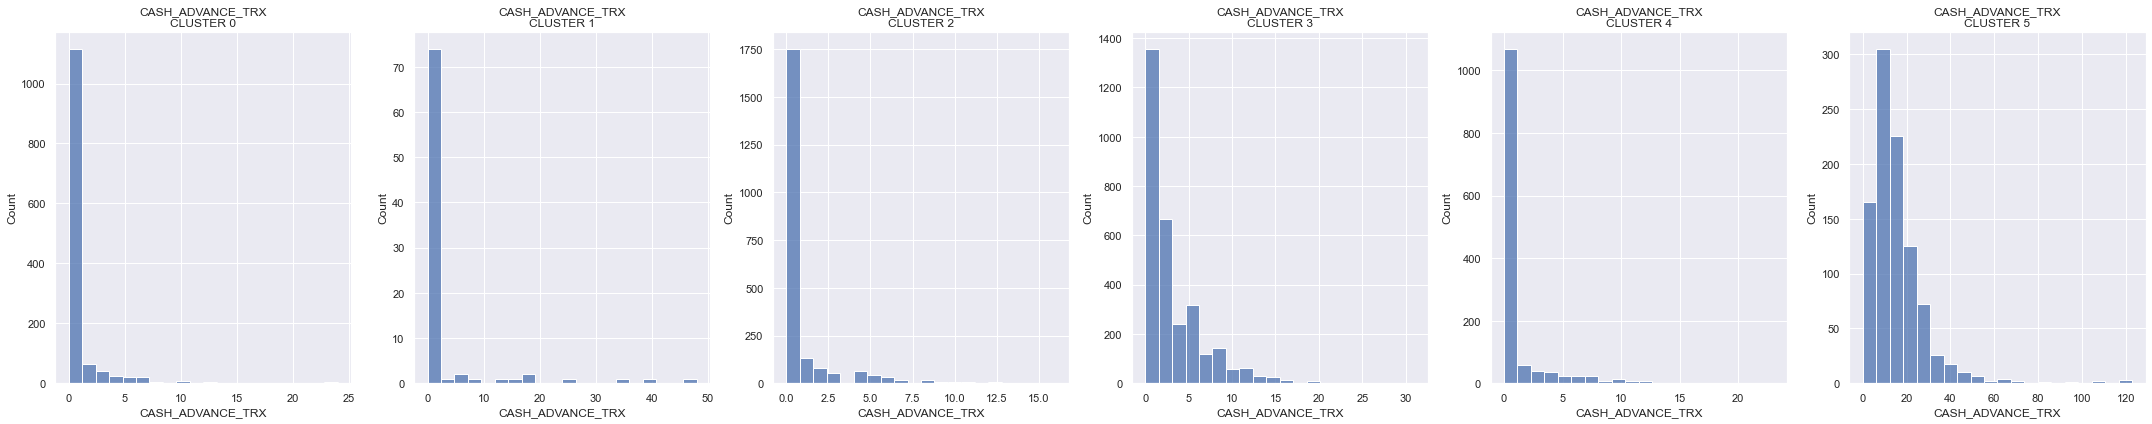

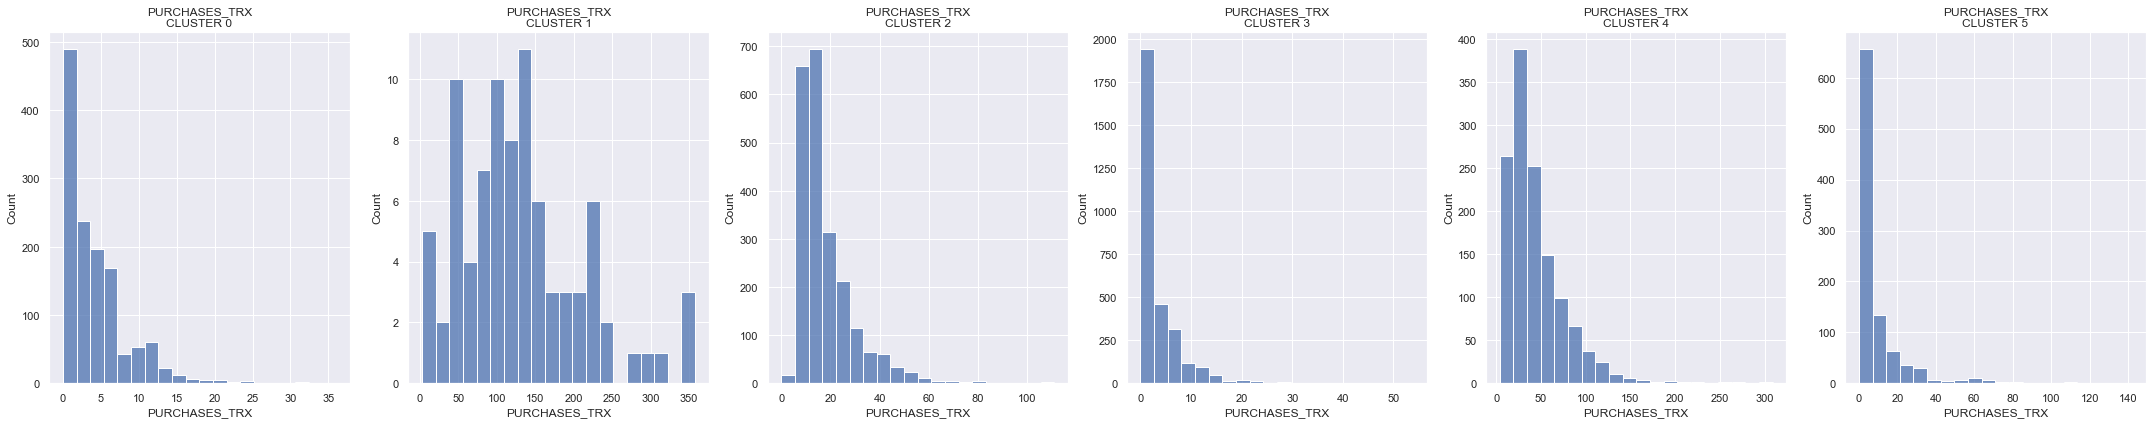

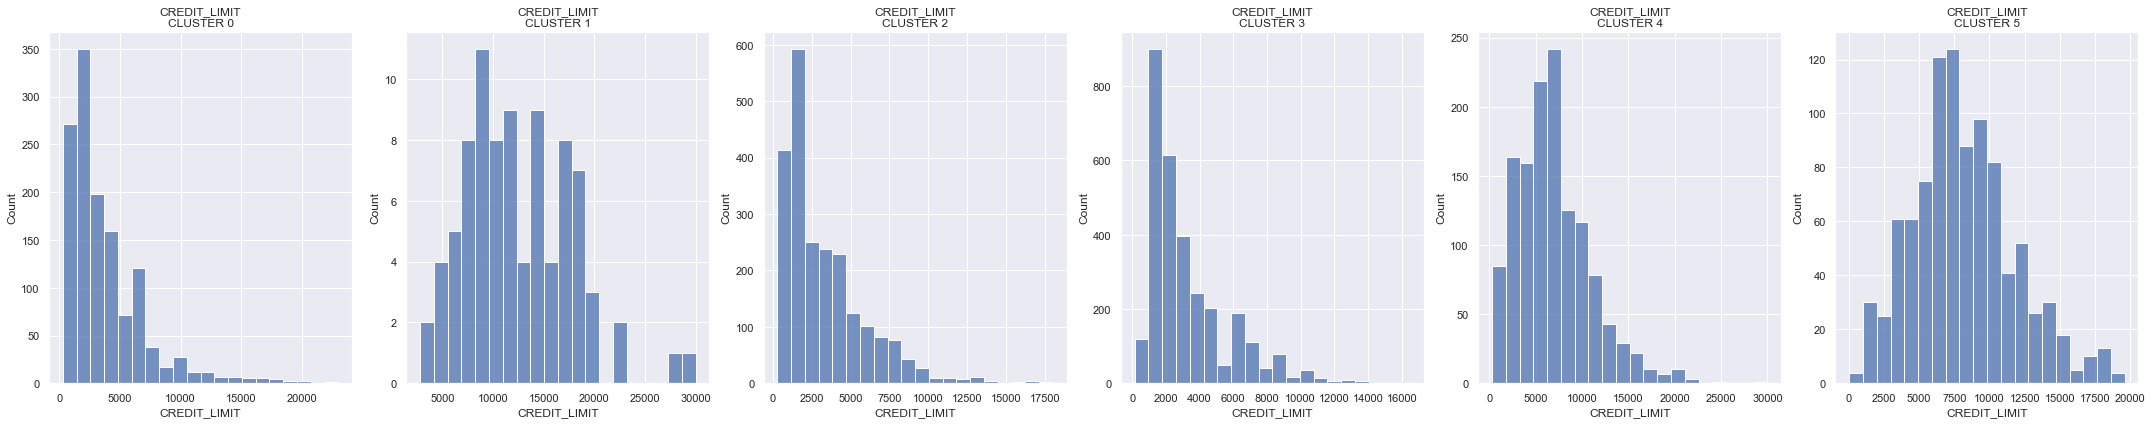

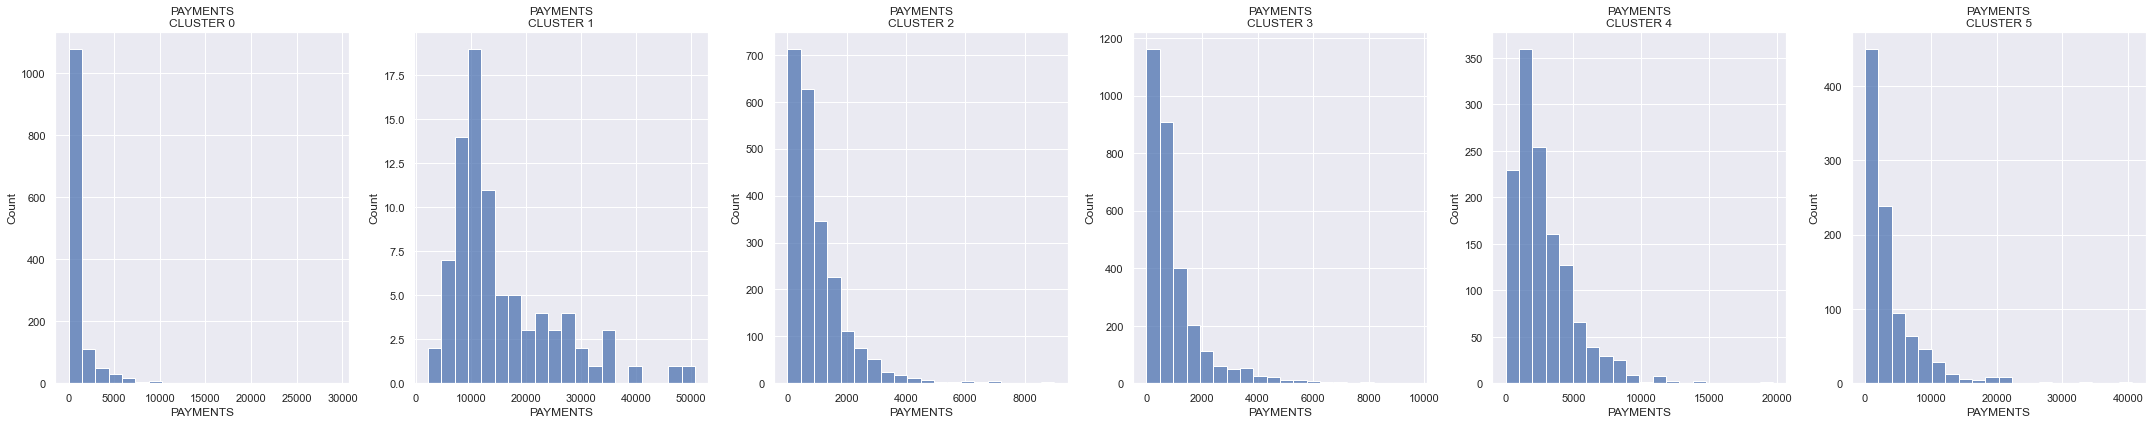

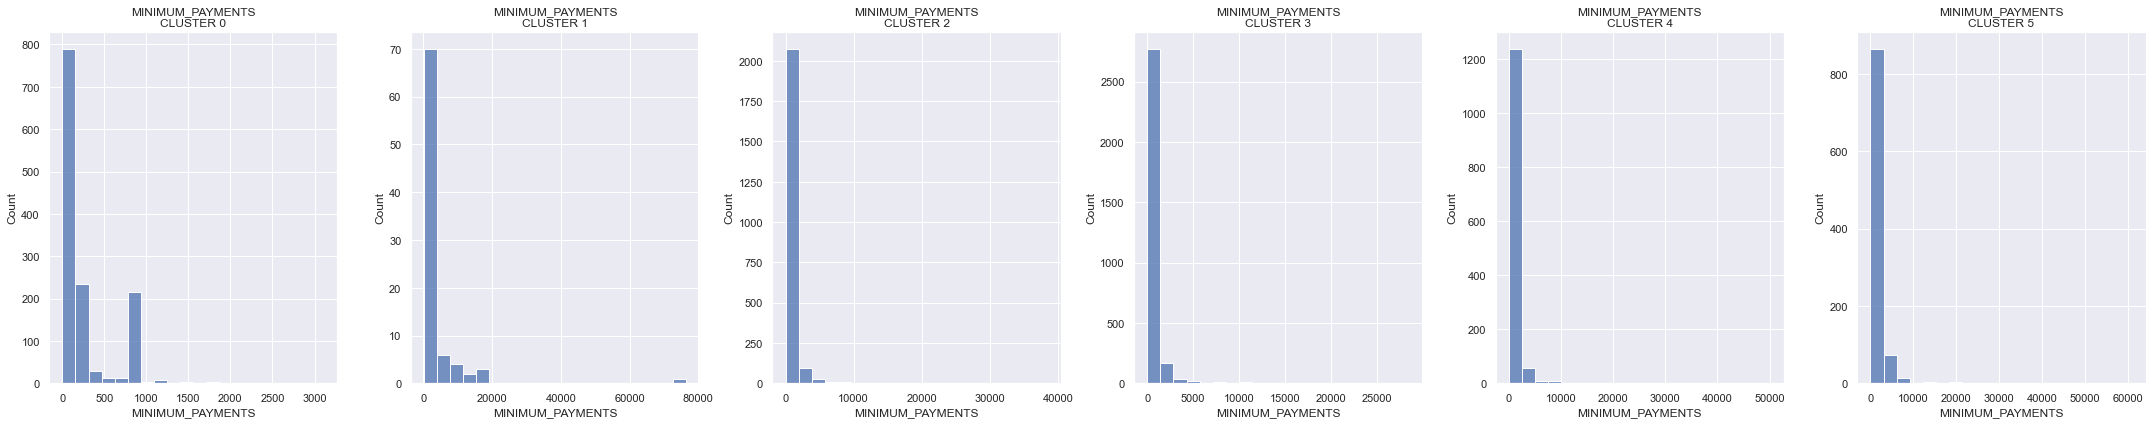

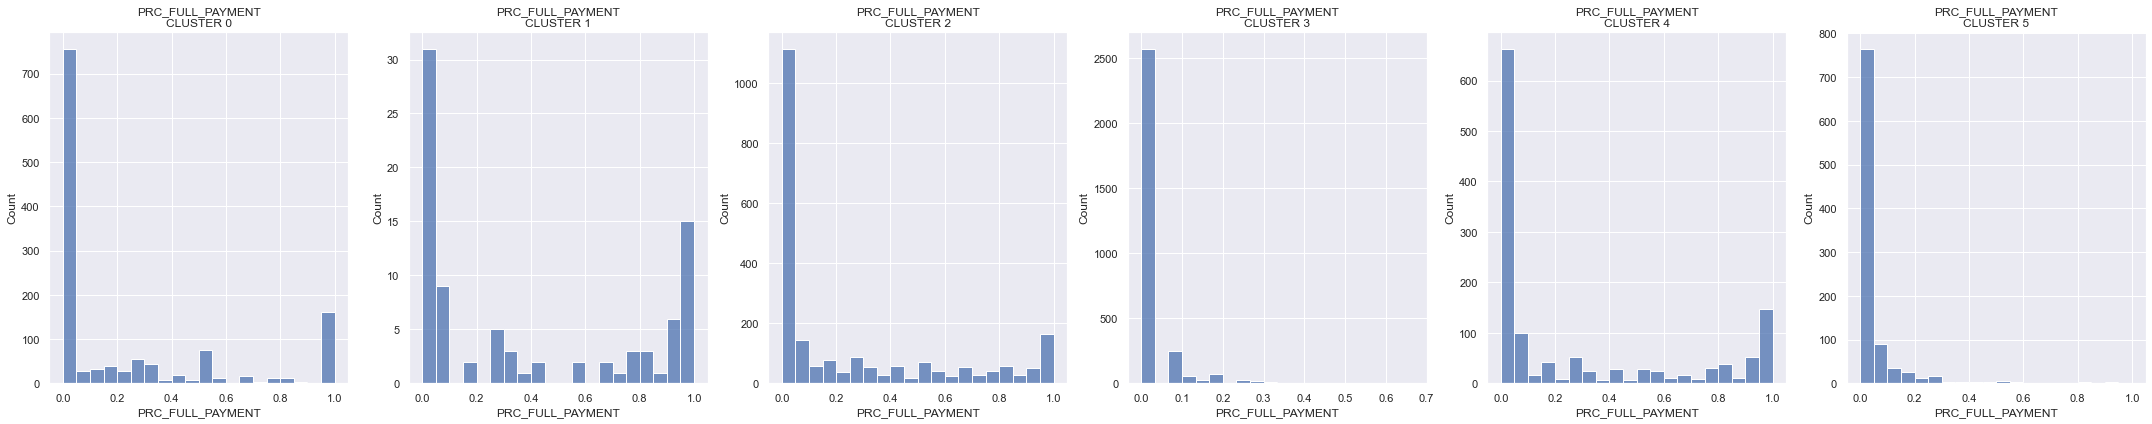

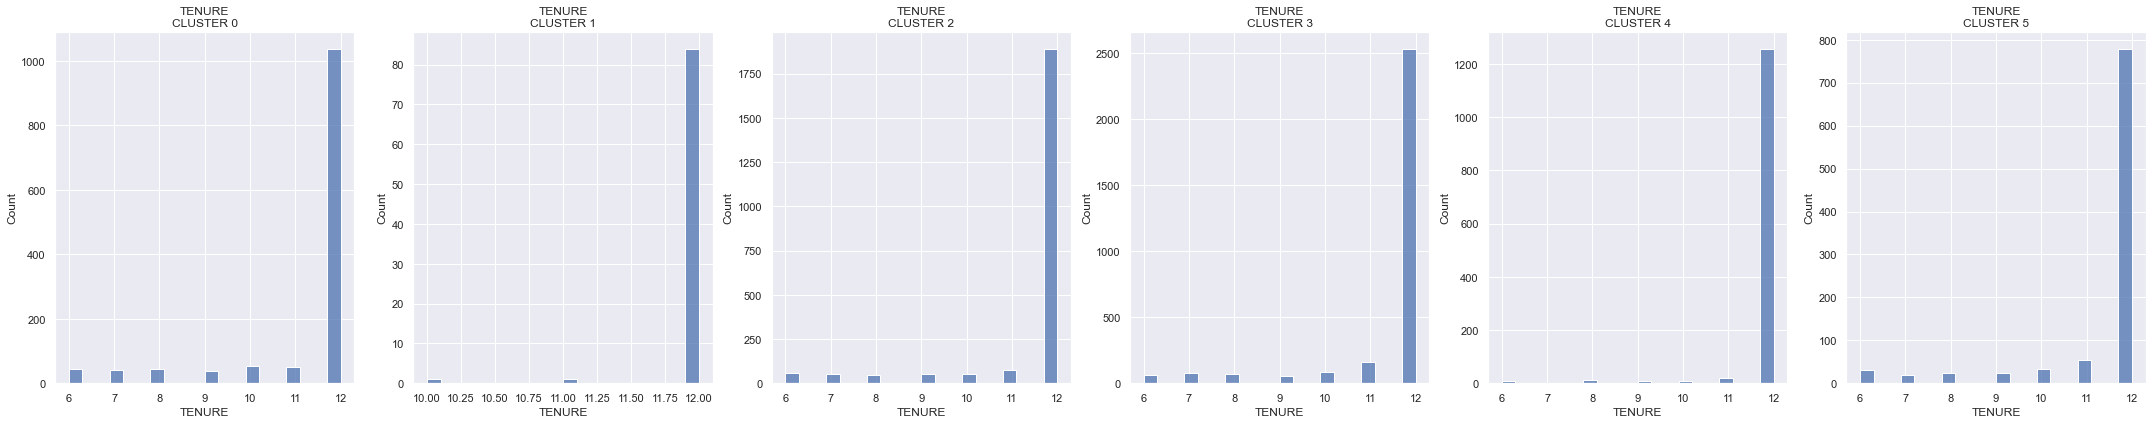

In [64]:
# plot the histogram of various clusters to display the distributions of each feature (17)
for i in creditcard_df.columns:
    plt.figure(figsize=(30, 6))
    for j in range(6):
        plt.subplot(1, 6, j+1)
        cluster = creditcard_with_labels_df[creditcard_with_labels_df['CLUSTER'] == j]
        sns.histplot(cluster[i], bins=20)
        plt.title('{}\nCLUSTER {}'.format(i, j))
        plt.tight_layout()

### 4. PCA (Principle Component Analysis) for Dimensionality Reduction (Option 1)

In [65]:
# obain the principle component, and reduce the dimensions of dataset to 2
pca = PCA(n_components=2)
principle_comp = pca.fit_transform(creditcard_scaled_df)

principle_comp.shape

(8950, 2)

In [68]:
# create a principle component data frame
pca_df = pd.DataFrame(data=principle_comp, columns=['pca_1', 'pca_2'])
pca_df = pd.concat([pca_df, pd.DataFrame(data=labels, columns=['CLUSTER'])], axis=1)
pca_df.head()

,pca_1,pca_2,CLUSTER
0,-1.682222,-1.076451,3
1,-1.138302,2.506471,5
2,0.969686,-0.383519,4
3,-0.873629,0.043164,3
4,-1.599435,-0.688580,3


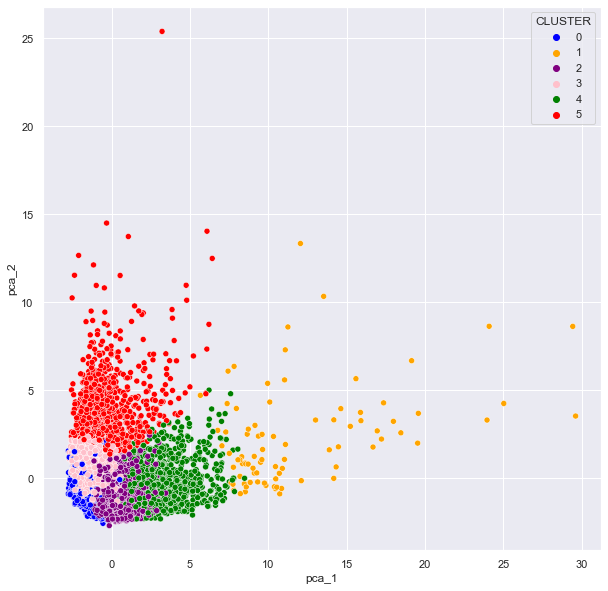

In [71]:
# plot a scatter chart to display the data frame
plt.figure(figsize=(10, 10))
sns.scatterplot(x='pca_1', y='pca_2', data=pca_df, hue='CLUSTER',
                palette=['blue','orange','purple','pink','green','red']);

### 5. Autoencoder for Dimensionality Reduction (Option 2)

In [72]:
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from keras.optimizers import SGD

Using TensorFlow backend.


**Applied Autoencoder Model (Deep Learning Model)**

In [76]:
encoding_dim = 6 # len(set(labels))
input_df = Input(shape=(len(creditcard_df.columns),)) # 17

# layers for encoded
x = Dense(encoding_dim, activation='relu')(input_df)
x = Dense(500, activation='relu', kernel_initializer='glorot_uniform')(x)
x = Dense(500, activation='relu', kernel_initializer='glorot_uniform')(x)
x = Dense(2000, activation='relu', kernel_initializer='glorot_uniform')(x)

# encoded
# 10 is a dimension number you want to be
encoded = Dense(10, activation='relu',kernel_initializer='glorot_uniform')(x)

# layers for decoded
x = Dense(2000, activation='relu', kernel_initializer='glorot_uniform')(encoded)
x = Dense(500, activation='relu', kernel_initializer='glorot_uniform')(x)

# decoded
decoded = Dense(len(creditcard_df.columns), kernel_initializer='glorot_uniform')(x)

# autoencoder networks model
autoencoder = Model(input_df, decoded)

# encoder networks model
encoder = Model(input_df, encoded)

# compile the model
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

In [77]:
# input is x, output is y, input should same as output in autoencoder
autoencoder.fit(x=creditcard_scaled_df, y=creditcard_scaled_df, batch_size=128, epochs=30)

Epoch 1/30
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
70/70 [==============================] - 3s 39ms/step - loss: 0.6232
Epoch 2/30
70/70 [==============================] - 2s 32ms/step - loss: 0.3716
Epoch 3/30
70/70 [==============================] - 2s 34ms/step - loss: 0.2988
Epoch 4/30
70/70 [==============================] - 2s 32ms/step - loss: 0.2366
Epoch 5/30
70/70 [==============================] - 2s 35m

In [78]:
autoencoder.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 17)]              0         
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 108       
_________________________________________________________________
dense_7 (Dense)              (None, 500)               3500      
_________________________________________________________________
dense_8 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_9 (Dense)              (None, 2000)              1002000   
_________________________________________________________________
dense_10 (Dense)             (None, 10)                20010     
_________________________________________________________________
dense_11 (Dense)             (None, 2000)             

In [82]:
pred = encoder.predict(creditcard_scaled_df)
pred

array([[0.47242418, 0.        , 0.        , ..., 0.1304905 , 0.        ,
        0.        ],
       [1.6430066 , 0.        , 0.        , ..., 0.83063084, 0.        ,
        0.        ],
       [1.6465212 , 0.        , 0.        , ..., 0.47385716, 0.        ,
        0.        ],
       ...,
       [0.06515849, 0.        , 0.        , ..., 0.2254473 , 0.        ,
        0.        ],
       [1.1039246 , 0.        , 0.        , ..., 0.49521288, 0.        ,
        0.        ],
       [1.7150764 , 0.        , 0.        , ..., 0.509816  , 0.        ,
        0.        ]], dtype=float32)

In [83]:
pred.shape

(8950, 10)

In [84]:
inertia_2 = []

for i in range(1, 15):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(pred)
    inertia_2.append(kmeans.inertia_)
    
inertia_2

[67868.1328125,
 47578.68359375,
 40619.25390625,
 35941.1953125,
 32632.7734375,
 30181.916015625,
 28400.708984375,
 27092.15234375,
 25975.859375,
 24993.4609375,
 24147.390625,
 23320.275390625,
 22689.185546875,
 22015.845703125]

### 6. Elbow Method
**Find a optimal number of clusters**

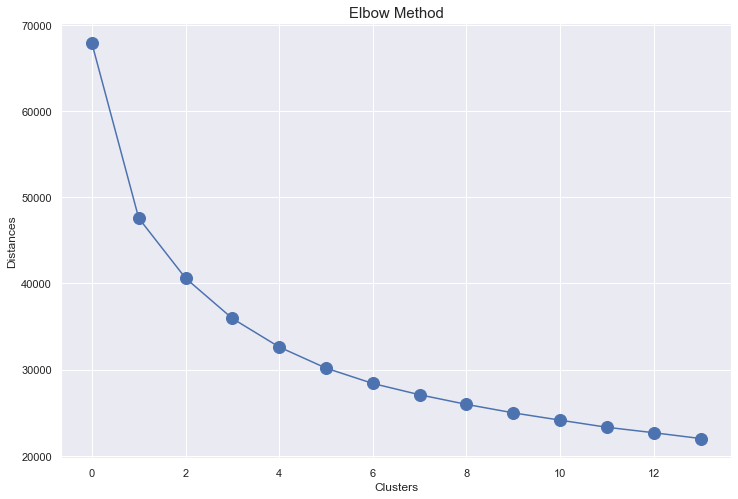

In [85]:
# using inertia_1 to plot a elbow chart
plt.figure(figsize=(12, 8))
plt.plot(inertia_2, marker='o', markersize=12)
plt.title('Elbow Method', fontdict={'fontsize':15})
plt.xlabel('Clusters')
plt.ylabel('Distances');

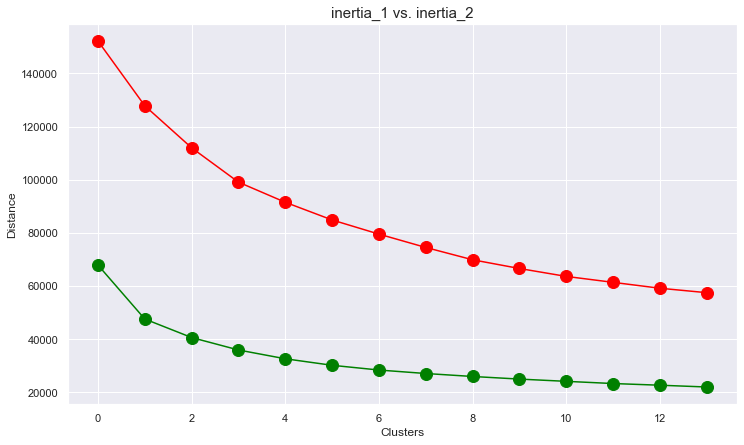

In [87]:
# compared two elbow plots
plt.figure(figsize=(12, 7))
plt.plot(inertia_1, marker='o', color='red', markersize=12)
plt.plot(inertia_2, marker='o', color='green', markersize=12)
plt.title('inertia_1 vs. inertia_2', fontdict={'fontsize':15})
plt.xlabel('Clusters')
plt.ylabel('Distance');

- I will choose number 4 to continue my coding baced on the elbow chart.

### 7. Apply K-Means Model

In [88]:
kmeans_autoencoder = KMeans(n_clusters=4)
kmeans_autoencoder.fit(pred)
labels = kmeans_autoencoder.labels_

In [89]:
creditcard_encoder_df = pd.concat([creditcard_df, pd.DataFrame(data=labels, columns=['CLUSTER'])], axis=1)
creditcard_encoder_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


In [91]:
creditcard_encoder_df['CLUSTER'].value_counts()

0    6294
1    1315
3    1224
2     117
Name: CLUSTER, dtype: int64

### 8. PCA

In [95]:
# obain the principle component, and reduce the dimensions of dataset to 2
pca_autoencoder = PCA(n_components=2)
principle_comp_autoencoder = pca.fit_transform(pred)

principle_comp_encoder.shape

(8950, 2)

In [99]:
# create a principle component data frame
pca_autoencodr_df = pd.DataFrame(data=principle_comp_autoencoder, columns=['pca_1', 'pca_2'])
pca_autoencodr_df = pd.concat([pca_autoencodr_df, pd.DataFrame(data=labels, columns=['CLUSTER'])], axis=1)
pca_autoencodr_df.head()

,pca_1,pca_2,CLUSTER
0,-1.810568,0.131127,0
1,0.245856,-1.333592,3
2,1.104686,0.553690,1
3,-0.290588,-0.305404,0
4,-1.590999,-0.082793,0


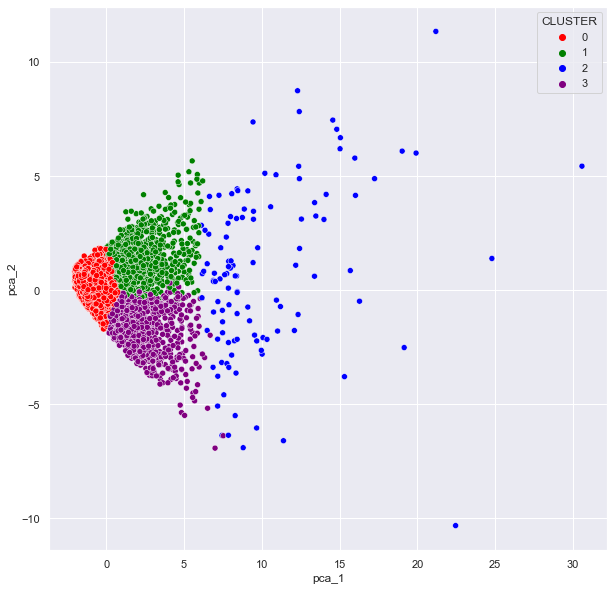

In [100]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x='pca_1', y='pca_2', hue='CLUSTER', data=pca_autoencodr_df, 
                palette=['red', 'green', 'blue', 'purple']);